In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pyvis
import networkx.algorithms.community as nx_comm

### Task 1.

In [2]:
# Create the network

net_1 = nx.Graph()

net_1.add_edges_from([(1, 2), (1, 3), (1, 7), (2, 4), (2, 8), 
                      (3, 5), (3, 11), (4, 6), (4, 12), (5, 6), (5, 7), 
                     (6, 8), (7, 9), (8, 10), (9, 10), (9, 12), (10, 11), (11, 12)])

# Visualizing with pyvis
net_vis = pyvis.network.Network()
net_vis.from_nx(net_1)
net_vis.show('net_vis.html')

In [3]:
# Descriptive measures
# About degrees
# Each node has 3 links

net_degrees = [net_1.degree()[i] for i in net_1.nodes()]

net_degrees = pd.Series(net_degrees)
print(net_degrees.value_counts())

net_degrees.sum() / len(net_1.nodes())

3    12
dtype: int64


3.0

In [4]:
# Diameter
nx.diameter(net_1)

3

In [5]:
# Centrality
deg = nx.degree_centrality(net_1)
closeness = nx.closeness_centrality(net_1)
betweenness = nx.betweenness_centrality(net_1)
eigenvector = nx.eigenvector_centrality(net_1)
pagerank = nx.pagerank(net_1)

centrality_net_1 = pd.DataFrame()
centrality_net_1['degree_centrality'] = deg.values()
centrality_net_1['closeness_centrality'] = closeness.values()
centrality_net_1['betweenness_centrality'] = betweenness.values()
centrality_net_1['eigenvector_centrality'] = eigenvector.values()
centrality_net_1['pagerank'] = pagerank.values()

centrality_net_1

,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,pagerank
0,0.272727,0.5,0.1,0.288675,0.083333
1,0.272727,0.5,0.1,0.288675,0.083333
2,0.272727,0.5,0.1,0.288675,0.083333
3,0.272727,0.5,0.1,0.288675,0.083333
4,0.272727,0.5,0.1,0.288675,0.083333
5,0.272727,0.5,0.1,0.288675,0.083333
6,0.272727,0.5,0.1,0.288675,0.083333
7,0.272727,0.5,0.1,0.288675,0.083333
8,0.272727,0.5,0.1,0.288675,0.083333
9,0.272727,0.5,0.1,0.288675,0.083333


In [6]:
# Correlation between centrality measures
# Cannot computer because all the values are the same
centrality_net_1.corr()

,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,pagerank
degree_centrality,NaN,NaN,NaN,NaN,NaN
closeness_centrality,NaN,NaN,NaN,NaN,NaN
betweenness_centrality,NaN,NaN,1.0,NaN,NaN
eigenvector_centrality,NaN,NaN,NaN,NaN,NaN
pagerank,NaN,NaN,NaN,NaN,NaN


### Task 2.

In [7]:
# Import data

sw = pd.read_csv('star_wars.csv', sep = ';')

# Printing out the head of the dataset
print(sw.head())

    source target
0    C-3PO  R2-D2
1     LUKE  R2-D2
2  OBI-WAN  R2-D2
3     LEIA  R2-D2
4      HAN  R2-D2


In [8]:
# Create the network
sw_net = nx.from_pandas_edgelist(sw, 'source', 'target')

sw_net.edges()

EdgeView([('C-3PO', 'R2-D2'), ('C-3PO', 'CHEWBACCA'), ('C-3PO', 'BERU'), ('C-3PO', 'LUKE'), ('C-3PO', 'OWEN'), ('C-3PO', 'LEIA'), ('C-3PO', 'OBI-WAN'), ('C-3PO', 'HAN'), ('C-3PO', 'BIGGS'), ('C-3PO', 'RED LEADER'), ('R2-D2', 'LUKE'), ('R2-D2', 'OBI-WAN'), ('R2-D2', 'LEIA'), ('R2-D2', 'HAN'), ('R2-D2', 'CHEWBACCA'), ('R2-D2', 'DODONNA'), ('LUKE', 'CHEWBACCA'), ('LUKE', 'CAMIE'), ('LUKE', 'BIGGS'), ('LUKE', 'BERU'), ('LUKE', 'OWEN'), ('LUKE', 'LEIA'), ('LUKE', 'OBI-WAN'), ('LUKE', 'HAN'), ('LUKE', 'DODONNA'), ('LUKE', 'GOLD LEADER'), ('LUKE', 'WEDGE'), ('LUKE', 'RED LEADER'), ('LUKE', 'RED TEN'), ('OBI-WAN', 'CHEWBACCA'), ('OBI-WAN', 'LEIA'), ('OBI-WAN', 'HAN'), ('OBI-WAN', 'DARTH VADER'), ('LEIA', 'CHEWBACCA'), ('LEIA', 'DARTH VADER'), ('LEIA', 'BERU'), ('LEIA', 'MOTTI'), ('LEIA', 'TARKIN'), ('LEIA', 'HAN'), ('LEIA', 'BIGGS'), ('LEIA', 'RED LEADER'), ('HAN', 'CHEWBACCA'), ('HAN', 'GREEDO'), ('HAN', 'JABBA'), ('CHEWBACCA', 'DARTH VADER'), ('CHEWBACCA', 'DODONNA'), ('DODONNA', 'GOLD LEADE

In [9]:
# Visualizing with pyvis
sw_vis = pyvis.network.Network()
sw_vis.from_nx(sw_net)
sw_vis.show('sw_vis.html')

In [10]:
list(sw_net.nodes())

['C-3PO',
 'R2-D2',
 'LUKE',
 'OBI-WAN',
 'LEIA',
 'HAN',
 'CHEWBACCA',
 'DODONNA',
 'DARTH VADER',
 'CAMIE',
 'BIGGS',
 'BERU',
 'OWEN',
 'MOTTI',
 'TARKIN',
 'GREEDO',
 'JABBA',
 'GOLD LEADER',
 'WEDGE',
 'RED LEADER',
 'RED TEN']

In [11]:
# Centrality
deg = nx.degree_centrality(sw_net)
closeness = nx.closeness_centrality(sw_net)
betweenness = nx.betweenness_centrality(sw_net)
eigenvector = nx.eigenvector_centrality(sw_net)
pagerank = nx.pagerank(sw_net)

centrality_sw_net = pd.DataFrame(index = sw_net.nodes())
centrality_sw_net['degree_centrality'] = deg.values()
centrality_sw_net['closeness_centrality'] = closeness.values()
centrality_sw_net['betweenness_centrality'] = betweenness.values()
centrality_sw_net['eigenvector_centrality'] = eigenvector.values()
centrality_sw_net['pagerank'] = pagerank.values()

centrality_sw_net

,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,pagerank
C-3PO,0.50,0.666667,0.063659,0.342378,0.076621
R2-D2,0.35,0.606061,0.013158,0.276856,0.054630
LUKE,0.75,0.800000,0.328571,0.417385,0.115064
OBI-WAN,0.35,0.606061,0.016416,0.273542,0.055053
LEIA,0.60,0.714286,0.239975,0.362148,0.092923
HAN,0.40,0.625000,0.194737,0.265285,0.071785
CHEWBACCA,0.40,0.625000,0.039223,0.293093,0.062102
DODONNA,0.25,0.512821,0.012281,0.169490,0.040952
DARTH VADER,0.25,0.476190,0.013158,0.140766,0.043741
CAMIE,0.10,0.465116,0.000000,0.084111,0.020509


In [12]:
# Top 5 based on each centrality
for col in centrality_sw_net.columns:
    result = list(centrality_sw_net.sort_values(by = col, ascending = False).index[:5])
    print('The top 5 characters based on', col, 'in the Star Wars movie are', result)

The top 5 characters based on degree_centrality in the Star Wars movie are ['LUKE', 'LEIA', 'C-3PO', 'HAN', 'CHEWBACCA']
The top 5 characters based on closeness_centrality in the Star Wars movie are ['LUKE', 'LEIA', 'C-3PO', 'HAN', 'CHEWBACCA']
The top 5 characters based on betweenness_centrality in the Star Wars movie are ['LUKE', 'LEIA', 'HAN', 'C-3PO', 'CHEWBACCA']
The top 5 characters based on eigenvector_centrality in the Star Wars movie are ['LUKE', 'LEIA', 'C-3PO', 'CHEWBACCA', 'R2-D2']
The top 5 characters based on pagerank in the Star Wars movie are ['LUKE', 'LEIA', 'C-3PO', 'HAN', 'CHEWBACCA']


In [13]:
# Correlation
centrality_sw_net.corr()

,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,pagerank
degree_centrality,1.000000,0.978352,0.835396,0.972277,0.996658
closeness_centrality,0.978352,1.000000,0.811648,0.987890,0.972384
betweenness_centrality,0.835396,0.811648,1.000000,0.740340,0.865264
eigenvector_centrality,0.972277,0.987890,0.740340,1.000000,0.961308
pagerank,0.996658,0.972384,0.865264,0.961308,1.000000


### Task 3.

In [14]:
# Import data
sn_data = pd.read_csv('network_data.csv', sep = ';')

# Create network as it is an adjacency matrix

sn_net = nx.Graph(np.array(sn_data))

In [15]:
# Running community detection

communities = nx_comm.girvan_newman(sn_net)

# In this case, you do not want to create a list of all the steps, as that would require large computations
# comm_list = list(communities)

In [17]:
# It would take too much time to calculate all the steps for the whole network, so we can just consider the first few nodes

range(6)
list(range(6))

[0, 1, 2, 3, 4, 5]

In [19]:
# It would take too much time to calculate all the steps for the whole network, so we can just consider the first few nodes

node_selection = list(sn_net.nodes())[:100]

# Then use subgraph to create this smaller network
sn_selection = sn_net.subgraph(node_selection)

communities = nx_comm.girvan_newman(sn_selection)

In [20]:
# Collect community structure and calculate modularity

comm_list = []
modularity_list = []

for i in range(99):
    # In each step we calculate the next sep of the algorithm with .next()
    comm = communities.__next__()
    comm_list.append(comm)
    mod = nx_comm.modularity(sn_selection, comm)
    modularity_list.append(mod)
    print('The modularity with', len(comm), 'subcommunities is', mod)

The modularity with 2 subcommunities is -5.622722094716928e-05
The modularity with 3 subcommunities is -0.00018611210133502926
The modularity with 4 subcommunities is 0.0006258089691412781
The modularity with 5 subcommunities is 0.0003474842254530423
The modularity with 6 subcommunities is 0.001962330011054227
The modularity with 7 subcommunities is 0.0014287336842661283
The modularity with 8 subcommunities is 0.0017469797548268326
The modularity with 9 subcommunities is 0.002004500426764484
The modularity with 10 subcommunities is 0.002224348860667776
The modularity with 11 subcommunities is 0.0033297760244880275
The modularity with 12 subcommunities is 0.004412712299929421
The modularity with 13 subcommunities is 0.003279733797845118
The modularity with 14 subcommunities is 0.003009843137298974
The modularity with 15 subcommunities is 0.002739952476752773
The modularity with 16 subcommunities is 0.006955307231157943
The modularity with 17 subcommunities is 0.007254436046596599
The mo

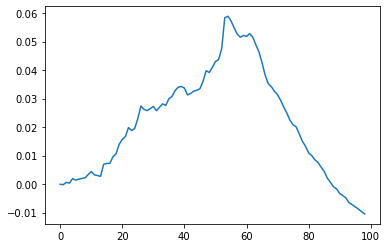

In [21]:
plt.plot(modularity_list)

In [22]:
# Create membership
comm_56 = comm_list[54]

comm_memb = []

for node in sn_selection:
    for i in range(len(comm_56)):
        if node in comm_56[i]:
            comm_memb.append(i)
            
print(comm_memb)

[0, 1, 2, 3, 4, 2, 5, 6, 7, 2, 5, 5, 8, 5, 5, 9, 10, 5, 5, 5, 11, 5, 12, 5, 5, 5, 5, 13, 14, 15, 5, 5, 16, 17, 5, 18, 13, 13, 5, 5, 19, 20, 21, 13, 5, 5, 22, 23, 5, 24, 25, 2, 14, 2, 14, 5, 26, 27, 28, 29, 30, 31, 5, 5, 32, 33, 34, 5, 14, 35, 36, 37, 13, 38, 39, 5, 40, 5, 41, 42, 43, 14, 44, 45, 46, 5, 47, 14, 5, 48, 5, 49, 50, 51, 5, 52, 53, 5, 54, 55]


In [23]:
# Import extra data
# We only need the first 100 rows as we created communities based on a selection

sn_extra_data = pd.read_csv('sngame.csv', sep = ';', decimal = ',').head(100)


sn_extra_data.head()

,gender,age,edu,salary,sn.conn,sn.min,game.min,game.purchase
0,Female,24,University,2934,2616,146.918954,29.383791,17
1,Female,20,University,3534,2140,132.224770,15.866972,6
2,Male,27,University,3245,2700,154.451440,27.801259,16
3,Male,23,University,2313,2369,117.287839,34.013473,22
4,Male,23,High School,3685,2507,104.332542,22.953159,18


In [24]:
# Add membership
sn_extra_data['memb'] = comm_memb

print(sn_extra_data.head())

   gender  age          edu  salary  sn.conn      sn.min   game.min  \
0  Female   24   University    2934     2616  146.918954  29.383791   
1  Female   20   University    3534     2140  132.224770  15.866972   
2    Male   27   University    3245     2700  154.451440  27.801259   
3    Male   23   University    2313     2369  117.287839  34.013473   
4    Male   23  High School    3685     2507  104.332542  22.953159   

   game.purchase  memb  
0             17     0  
1              6     1  
2             16     2  
3             22     3  
4             18     4  


In [25]:
# Do some descriptive analysis

comm_sn = sn_extra_data.groupby('memb')

# We can check gender
comm_sn['gender'].value_counts()

memb  gender
0     Female     1
1     Female     1
2     Male       3
      Female     2
3     Male       1
4     Male       1
5     Male      17
      Female    15
6     Female     1
7     Male       1
8     Female     1
9     Female     1
10    Male       1
11    Male       1
12    Female     1
13    Female     4
      Male       1
14    Male       5
      Female     1
15    Male       1
16    Female     1
17    Female     1
18    Female     1
19    Male       1
20    Male       1
21    Female     1
22    Female     1
23    Female     1
24    Female     1
25    Male       1
26    Male       1
27    Female     1
28    Female     1
29    Male       1
30    Female     1
31    Male       1
32    Female     1
33    Male       1
34    Male       1
35    Male       1
36    Male       1
37    Female     1
38    Male       1
39    Male       1
40    Female     1
41    Female     1
42    Male       1
43    Male       1
44    Female     1
45    Male       1
46    Male       1
47    Female     1